In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets

In [2]:
#Predicting how worse the diabetes will get within the next year
# Load the diabetes dataset

diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)


In [3]:
alpha= 0.2
epochs=2000

In [4]:
X=pd.DataFrame.from_records(diabetes_X)

In [5]:
# Hypothesis function 
def h(theta_0, thetas, x):
    return theta_0 + np.dot(thetas, x)

In [6]:
#Cost function 

def Cost_Function(theta_0, thetas, m):
    tmp=0
    for i in range(0,m):
        tmp+=np.square((h(theta_0, thetas, X.iloc[i])-diabetes_y[i]))
    
    return (1/(2*m))*tmp 
    

In [7]:
def DerivativeJ(theta_0, thetas, m, j):
    tmp=0
    for i in range(0,m):
        tmp+=(h(theta_0, thetas, X.iloc[i])-diabetes_y[i])*X.iloc[i,j]
    
    return alpha*(1/(m))*tmp 

In [8]:
def Gradient_Decent (theta_0, thetas):
    theta_0 = theta_0 - DerivativeJ(theta_0, thetas, len(X), 0)
    for j in range(len(thetas)):
        thetas[j] = thetas[j] - DerivativeJ(theta_0, thetas, len(X), j)
    return theta_0, thetas

In [9]:
# Mean normalization 
# avg=np.mean(diabetes_y)
# std=np.std (diabetes_y)
# for i in range(len(diabetes_y)):
#     diabetes_y[i] =  (diabetes_y[i] - avg)/std

In [10]:
theta_0= np.array([1])
thetas = np.random.uniform (-1,1,10)

for x in range (epochs):
    theta_0, thetas = Gradient_Decent(theta_0, thetas)
    print (Cost_Function(theta_0, thetas, len(X)))


[14361.53595303]
[14336.93792835]
[14312.41778847]
[14287.97527499]
[14263.61013044]
[14239.32209824]
[14215.11092277]
[14190.97634928]
[14166.91812395]
[14142.93599387]
[14119.029707]
[14095.19901223]
[14071.44365933]
[14047.76339897]
[14024.15798269]
[14000.62716293]
[13977.17069301]
[13953.78832713]
[13930.47982035]
[13907.24492863]
[13884.08340877]
[13860.99501844]
[13837.9795162]
[13815.03666143]
[13792.1662144]
[13769.36793621]
[13746.64158881]
[13723.98693501]
[13701.40373846]
[13678.89176365]
[13656.45077589]
[13634.08054136]
[13611.78082704]
[13589.55140074]
[13567.39203112]
[13545.30248763]
[13523.28254057]
[13501.33196103]
[13479.45052093]
[13457.63799299]
[13435.89415074]
[13414.21876853]
[13392.61162147]
[13371.07248552]
[13349.6011374]
[13328.19735464]
[13306.86091554]
[13285.5915992]
[13264.38918552]
[13243.25345514]
[13222.18418952]
[13201.18117088]
[13180.24418219]
[13159.37300722]
[13138.5674305]
[13117.82723731]
[13097.15221371]
[13076.5421465]
[13055.99682325]
[1303

[8137.64947275]
[8132.57842925]
[8127.52414434]
[8122.48657165]
[8117.46566499]
[8112.46137831]
[8107.4736657]
[8102.50248142]
[8097.54777986]
[8092.60951556]
[8087.68764321]
[8082.78211763]
[8077.89289381]
[8073.01992686]
[8068.16317206]
[8063.32258481]
[8058.49812067]
[8053.68973534]
[8048.89738464]
[8044.12102456]
[8039.36061123]
[8034.6161009]
[8029.88744997]
[8025.17461499]
[8020.47755263]
[8015.79621972]
[8011.1305732]
[8006.48057019]
[8001.84616789]
[7997.2273237]
[7992.6239951]
[7988.03613975]
[7983.46371541]
[7978.90668]
[7974.36499156]
[7969.83860826]
[7965.32748843]
[7960.8315905]
[7956.35087306]
[7951.88529481]
[7947.43481459]
[7942.99939137]
[7938.57898426]
[7934.17355249]
[7929.78305541]
[7925.40745252]
[7921.04670344]
[7916.70076792]
[7912.36960583]
[7908.05317718]
[7903.75144208]
[7899.46436081]
[7895.19189374]
[7890.93400138]
[7886.69064436]
[7882.46178344]
[7878.24737951]
[7874.04739356]
[7869.86178672]
[7865.69052025]
[7861.53355552]
[7857.39085403]
[7853.2623774]
[7

[7008.67900338]
[7008.3926802]
[7008.1110284]
[7007.83403756]
[7007.56169733]
[7007.29399736]
[7007.03092732]
[7006.77247695]
[7006.51863595]
[7006.26939411]
[7006.0247412]
[7005.78466703]
[7005.54916144]
[7005.3182143]
[7005.09181549]
[7004.86995492]
[7004.65262253]
[7004.43980829]
[7004.23150218]
[7004.02769421]
[7003.82837443]
[7003.63353289]
[7003.44315968]
[7003.25724492]
[7003.07577873]
[7002.89875129]
[7002.72615276]
[7002.55797337]
[7002.39420335]
[7002.23483295]
[7002.07985245]
[7001.92925217]
[7001.78302242]
[7001.64115356]
[7001.50363598]
[7001.37046006]
[7001.24161624]
[7001.11709496]
[7000.99688669]
[7000.88098192]
[7000.76937118]
[7000.66204501]
[7000.55899396]
[7000.46020864]
[7000.36567964]
[7000.2753976]
[7000.18935317]
[7000.10753704]
[7000.02993991]
[6999.95655251]
[6999.88736557]
[6999.82236986]
[6999.76155619]
[6999.70491537]
[6999.65243822]
[6999.60411562]
[6999.55993844]
[6999.51989759]
[6999.48398398]
[6999.45218858]
[6999.42450234]
[6999.40091627]
[6999.3814213

[7303.69388752]
[7304.85932599]
[7306.02628254]
[7307.19475377]
[7308.36473629]
[7309.5362267]
[7310.70922162]
[7311.88371766]
[7313.05971145]
[7314.23719963]
[7315.41617883]
[7316.59664569]
[7317.77859688]
[7318.96202904]
[7320.14693884]
[7321.33332295]
[7322.52117804]
[7323.7105008]
[7324.90128792]
[7326.09353608]
[7327.287242]
[7328.48240238]
[7329.67901392]
[7330.87707335]
[7332.0765774]
[7333.27752279]
[7334.47990626]
[7335.68372456]
[7336.88897443]
[7338.09565263]
[7339.30375592]
[7340.51328106]
[7341.72422484]
[7342.93658402]
[7344.1503554]
[7345.36553576]
[7346.58212191]
[7347.80011063]
[7349.01949875]
[7350.24028307]
[7351.46246043]
[7352.68602763]
[7353.91098152]
[7355.13731892]
[7356.3650367]
[7357.59413169]
[7358.82460074]
[7360.05644073]
[7361.28964852]
[7362.52422097]
[7363.76015497]
[7364.9974474]
[7366.23609515]
[7367.47609512]
[7368.7174442]
[7369.9601393]
[7371.20417734]
[7372.44955523]
[7373.6962699]
[7374.94431826]
[7376.19369727]
[7377.44440386]
[7378.69643497]
[73

In [11]:
predict = []
for x in range (100):
    predict.append(h(theta_0, thetas, X.iloc[x]))

In [12]:
real = diabetes_y [0:100]

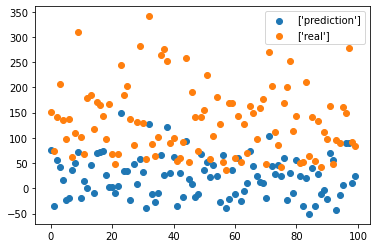

In [13]:
plt.scatter(np.arange(100), predict, label=["prediction"])
plt.scatter(np.arange(100), real, label = ["real"])
plt.legend()

In [ ]:
h(theta_0, thetas, X.iloc[100])

In [ ]:
diabetes_y[100]